## Дифференциально экспрессированные гены

### Обнаружение статистически значимых отличий в уровнях экспрессии генов больных раком

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
import statsmodels
import scipy as sc
from statsmodels.sandbox.stats.multicomp import multipletests 
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

#### Описание используемых данных
Данные для этой задачи взяты из исследования, проведенного в Stanford School of Medicine. В исследовании была предпринята попытка выявить набор генов, которые позволили бы более точно диагностировать возникновение рака груди на самых ранних стадиях.

В эксперименте принимали участие 24 человек, у которых не было рака груди (normal), 25 человек, у которых это заболевание было диагностировано на ранней стадии (early neoplasia), и 23 человека с сильно выраженными симптомами (cancer).

Ученые провели секвенирование биологического материала испытуемых, чтобы понять, какие из этих генов наиболее активны в клетках больных людей.

Секвенирование — это определение степени активности генов в анализируемом образце с помощью подсчёта количества соответствующей каждому гену РНК.

В данных содерижится именно эта количественная мера активности каждого из 15748 генов у каждого из 72 человек, принимавших участие в эксперименте.

Необходимо определить те гены, активность которых у людей в разных стадиях заболевания отличается статистически значимо.

Кроме того, нужно оценить не только статистическую, но и практическую значимость этих результатов, которая часто используется в подобных исследованиях.

Диагноз человека содержится в столбце под названием "Diagnosis".

In [4]:
data = pd.read_csv('gene_high_throughput_sequencing.csv')
data.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


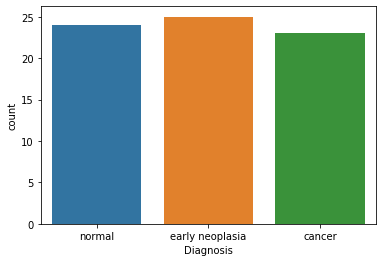

In [9]:
sns.countplot(x='Diagnosis', data=data);

In [10]:
data['Diagnosis'].value_counts()

early neoplasia    25
normal             24
cancer             23
Name: Diagnosis, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 15750 entries, Patient_id to EIF1AY
dtypes: float64(15748), object(2)
memory usage: 8.7+ MB


**Часть 1: применение t-критерия Стьюдента**

В первой части нужно применить критерий Стьюдента для проверки гипотезы о равенстве средних в двух независимых выборках. Применить критерий для каждого гена нужно будет дважды:
- для групп normal (control) и early neoplasia (treatment)
- для групп early neoplasia (control) и cancer (treatment)
В качестве ответа в этой части задания необходимо указать количество статистически значимых отличий, которые были выявлены с помощью t-критерия Стьюдента, то есть число генов, у которых p-value этого теста оказался меньше, чем уровень значимости.

Критерий Стьюдента:

$H_0\colon$ средние значения степени активности генов для пациентов с разными диагнозами одинаковы.

$H_1\colon$ не одинаковы.

In [16]:
normal = data[data['Diagnosis'] == 'normal']
neopla = data[data['Diagnosis'] == 'early neoplasia']
cancer = data[data['Diagnosis'] == 'cancer']

In [17]:
normal.shape, neopla.shape, cancer.shape

((24, 15750), (25, 15750), (23, 15750))

In [23]:
type(normal.iloc[:,2])

pandas.core.series.Series

In [25]:
sc.stats.ttest_ind(normal.iloc[:,2], neopla.iloc[:,2])

Ttest_indResult(statistic=0.400507602393171, pvalue=0.6905974705672389)

In [26]:
sc.stats.ttest_ind(normal.iloc[:,3], neopla.iloc[:,3])

Ttest_indResult(statistic=-4.594020846356375, pvalue=3.270551648843359e-05)

In [43]:
%%time
stat1 = sc.stats.ttest_ind(normal.iloc[:,2:], neopla.iloc[:,2:], equal_var = False)

Wall time: 70 ms


In [44]:
stat1[0].shape

(15748,)

In [45]:
%%time
stat2 = sc.stats.ttest_ind(neopla.iloc[:,2:], cancer.iloc[:,2:], equal_var = False)

Wall time: 34 ms


In [46]:
stat2[0].shape

(15748,)

In [41]:
def write_answer(file, d):
    with open(file, "w") as fout:
        fout.write(str(d))

In [47]:
np.sum(stat1[1] < 0.05)

1575

In [48]:
np.sum(stat2[1] < 0.05)

3490

In [49]:
write_answer('bioinformatics_ans1.txt', np.sum(stat1[1] < 0.05))
write_answer('bioinformatics_ans2.txt', np.sum(stat2[1] < 0.05))

**Часть 2: поправка методом Холма**

В этой части задания нужно применить поправку Холма для получившихся двух наборов достигаемых уровней значимости из предыдущей части. Поскольку делается поправку для каждого из двух наборов p-value отдельно, то проблема, связанная с множественной проверкой останется.

Для того, чтобы ее устранить, достаточно воспользоваться поправкой Бонферрони, то есть использовать уровень значимости 0.05 / 2 вместо 0.05 для дальнейшего уточнения значений p-value c помощью метода Холма.

В качестве ответа к этому заданию требуется ввести количество значимых отличий в каждой группе после того, как произведена коррекция Холма-Бонферрони. Причем это число нужно ввести с учетом практической значимости: посчитать для каждого значимого изменения fold change и выписать в ответ число таких значимых изменений, абсолютное значение fold change которых больше, чем 1.5.

Важно:
- применять поправку на множественную проверку нужно ко всем значениям достигаемых уровней значимости, а не только для тех, которые меньше значения уровня доверия.
- при использовании поправки на уровне значимости 0.025 меняются значения достигаемого уровня значимости, но не меняется значение уровня доверия (то есть для отбора значимых изменений скорректированные значения уровня значимости нужно сравнивать с порогом 0.025, а не 0.05)!

**Практическая значимость изменения**
Цель исследований — найти гены, средняя экспрессия которых отличается не только статистически значимо, но и достаточно сильно. В экспрессионных исследованиях для этого часто используется метрика, которая называется fold change (кратность изменения). Определяется она следующим образом:

Fc(C,T)=
T/C,T>C
-T/C, T<C
где C,T — средние значения экспрессии гена в control и treatment группах соответственно. По сути, fold change показывает, во сколько раз отличаются средние двух выборок.

Инструкции к решени

In [13]:
import statsmodels.stats.multitest as smm

In [51]:
reject1, p_corrected1, a1, a2 = multipletests(stat1[1], 
                                            alpha = 0.025, 
                                            method = 'holm') 

In [52]:
reject2, p_corrected2, a1, a2 = multipletests(stat2[1], 
                                            alpha = 0.025, 
                                            method = 'holm') 

In [54]:
sum(reject1), sum(reject2)

(2, 79)

In [55]:
sum(p_corrected1 < 0.025)

2

In [58]:
reject1.shape

(15748,)

In [65]:
ind1 = np.where(reject1)[0]+2

In [67]:
normal.iloc[:, ind1]

,PCSK4,EEF1A2
0,15.143680,20.880435
1,23.221137,12.355210
2,16.750119,17.750992
3,7.823932,21.968009
4,15.661885,11.446869
5,18.381632,20.512741
6,19.261454,27.674988
7,14.823633,16.443229
8,15.828090,14.936895
9,10.708421,10.895482


In [114]:
a = np.array(np.mean(normal.iloc[:, ind1]))

In [115]:
b = np.array(np.mean(neopla.iloc[:, ind1]))

In [116]:
a

array([14.98342424, 19.3736122 ])

In [117]:
b

array([22.62175639, 38.2603203 ])

In [144]:
a.shape[0]

2

In [155]:
def fold_change(a,b):
    return np.amax((a,b), axis = 0) / np.amin((a,b), axis = 0)

In [154]:
np.amax((a,b), axis = 0) / np.amin((a,b), axis = 0)

array([1.50978548, 1.97486767])

In [156]:
fold_change(a, b)

array([1.50978548, 1.97486767])

In [157]:
ind2 = np.where(reject2)[0]+2

In [158]:
a2 = np.array(np.mean(neopla.iloc[:, ind2]))
b2 = np.array(np.mean(cancer.iloc[:, ind2]))

In [159]:
a2

array([  7.2242754 ,  23.2345509 ,  23.73485794,  93.81097789,
        11.61928995,  13.85374426,  23.55036941,   9.9758859 ,
        79.80750795,  58.74420755,   7.43255051,  20.01058997,
        36.73193998,  75.54289166,  12.85636818,  38.74064373,
        12.81467401,  15.14272985, 119.55363876,   6.58625707,
         5.24881943,  20.53067717,   3.87851906,  17.19603443,
         9.25457133,   6.1711664 ,  72.4070366 ,  10.35933249,
        17.93638505,  19.04480954,  60.25464425,  35.12071185,
         5.92300182,  40.66235114,  45.21267474,   6.7731953 ,
         9.30513677,  12.43998153,  32.84125995,   8.98545253,
         8.3168248 ,  11.84230679,  46.5193767 ,  32.22491523,
        21.34832156,  20.90674852,   4.06015157,  15.36747876,
        10.85655343,  10.328128  ,   3.96654828,  17.43151525,
        13.5447071 ,   5.75110653,   5.1554173 ,  21.33668875,
        35.57993386,  49.09254384,  18.79329732,  16.56042393,
        19.10084566,  26.67648023,   5.65309794,  10.38

In [160]:
a2 > b2

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True])

In [161]:
fold_change(a2, b2)

array([1.84386011, 2.38320974, 1.99738074, 1.69342761, 1.79563968,
       2.11952259, 1.63002308, 2.44923267, 3.03356616, 2.7937854 ,
       2.12593349, 1.93779595, 1.67439355, 2.00497754, 4.36483977,
       2.32349963, 1.7472427 , 2.04564868, 1.64752395, 2.73697373,
       2.14045836, 1.54883106, 2.57649902, 1.8542308 , 2.90551507,
       2.28879237, 2.67593247, 2.20896342, 2.00240242, 2.15360832,
       1.81647501, 1.71870947, 2.12017726, 1.9963597 , 2.09338187,
       2.81788761, 2.24641149, 2.38049626, 1.81757067, 2.78462157,
       2.44265404, 1.81955963, 2.27908596, 2.67543519, 3.35214598,
       1.8933657 , 1.99008018, 2.08237955, 1.65654077, 1.80525446,
       2.17177847, 1.98851437, 1.65060263, 2.75708797, 2.38109114,
       2.81863772, 2.79130034, 1.83683151, 2.03575403, 2.01139627,
       1.76248132, 2.56307303, 1.63641323, 2.38818545, 1.9955948 ,
       1.34177392, 2.16821757, 2.53383818, 1.59816783, 2.15903712,
       2.52563094, 1.30496821, 2.07890487, 4.30808606, 2.86894

In [162]:
sum(fold_change(a2, b2) > 1.5)

77

In [163]:
sum(fold_change(a, b) > 1.5)

2

In [164]:
write_answer('bioinformatics_ans3.txt', sum(fold_change(a, b) > 1.5))
write_answer('bioinformatics_ans4.txt', sum(fold_change(a2, b2) > 1.5))

**Часть 3: поправка методом Бенджамини-Хохберга**

Данная часть задания аналогична второй части за исключением того, что нужно использовать метод Бенджамини-Хохберга.

Методы коррекции, которые контролируют FDR, допускают больше ошибок первого рода и имеют большую мощность, чем методы, контролирующие FWER. Большая мощность означает, что эти методы будут совершать меньше ошибок второго рода (то есть будут лучше улавливать отклонения от H_0, когда они есть, и будут чаще отклонять H_0, когда отличий нет).

В качестве ответа к этому заданию требуется ввести количество значимых отличий в каждой группе после того, как произведена коррекция Бенджамини-Хохберга, причем так же, как и во второй части, считать только такие отличия, у которых abs(fold change) > 1.5.

*P.S. Вспомните, какое значение имеет уровень значимости alpha в каждой из поправок: Холма и Бенджамини-Хохберга. Одинаковый ли смысл имеет уровень значимости в каждой из поправок?*

In [165]:
reject3, p_corrected3, a1, a2 = multipletests(stat1[1], 
                                            alpha = 0.025, 
                                            method = 'fdr_bh') 

In [166]:
reject4, p_corrected4, a1, a2 = multipletests(stat2[1], 
                                            alpha = 0.025, 
                                            method = 'fdr_bh') 

In [167]:
sum(reject3), sum(reject4)

(4, 832)

In [168]:
ind3 = np.where(reject3)[0]+2
ind4 = np.where(reject4)[0]+2

In [169]:
a3 = np.array(np.mean(normal.iloc[:, ind3]))
b3 = np.array(np.mean(neopla.iloc[:, ind3]))
a4 = np.array(np.mean(neopla.iloc[:, ind4]))
b4 = np.array(np.mean(cancer.iloc[:, ind4]))

In [170]:
fold_change(a3, b3)

array([1.66382607, 1.50978548, 1.75495105, 1.97486767])

In [171]:
fold_change(a4, b4)

array([2.45886705, 1.32988386, 1.16802577, 1.84386011, 1.40650297,
       1.35410439, 1.56781412, 1.7367625 , 1.46208665, 1.75020037,
       1.42993285, 2.65376308, 1.19713151, 1.90368982, 1.46783124,
       2.18636018, 2.38320974, 1.3132689 , 1.97848149, 1.62534229,
       1.99738074, 1.4900858 , 2.08541367, 1.68856543, 2.12525298,
       2.04686577, 1.70496719, 1.66424492, 1.39979652, 1.51192183,
       1.8554171 , 1.62168165, 1.48099376, 1.5345145 , 1.74504408,
       1.38625603, 1.26115545, 1.28201774, 1.16780567, 1.6618105 ,
       1.41216009, 1.4659751 , 1.28851062, 1.30539992, 1.28419629,
       1.4160791 , 1.36143839, 1.36788852, 2.36585123, 1.69342761,
       1.281047  , 1.58850702, 2.5977658 , 1.6728668 , 1.88876355,
       1.51300893, 1.37461841, 1.8319274 , 1.79563968, 1.51601553,
       1.86530566, 1.32845564, 2.11952259, 2.33223012, 1.42073403,
       1.1893973 , 1.51638136, 1.67400504, 1.54464251, 1.30991215,
       1.43369755, 1.96968535, 1.22930521, 1.28015093, 1.55476

In [172]:
sum(fold_change(a3, b3) > 1.5)

4

In [173]:
sum(fold_change(a4, b4) > 1.5)

524

In [174]:
write_answer('bioinformatics_ans5.txt', sum(fold_change(a3, b3) > 1.5))
write_answer('bioinformatics_ans6.txt', sum(fold_change(a4, b4) > 1.5))